In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne import io
from mne.preprocessing import ICA
from mne_icalabel import label_components
import pyprep
from autoreject import AutoReject, get_rejection_threshold
%matplotlib qt
%gui qt

In [2]:
samprate = 1024
references = ["M1", "M2"] 
hifilt = 45
lowfilt = 0.5
externos = ["EOG"] 

path_suj_MF = 'C:/Users/Sebastian/Documents/NeuroZenProcessing/ParticipantsSet/Sujeto6_MF.set'
path_suj_R = 'C:/Users/Sebastian/Documents/NeuroZenProcessing/ParticipantsSet/Sujeto6_R.set'
channel_locations_path = 'C:/Users/Sebastian/Documents/NeuroZenProcessing/ParticipantsSet/channel_locations_MF.loc'
path_guardar_suj = 'C:/Users/Sebastian/Documents/NeuroZenProcessing/Preprocessed/' 
name_guardar_suj_MF = 'Sujeto6_MF_processed.mat'
name_guardar_suj_R = 'Sujeto6_R_processed.mat'

In [3]:
raw_data_MF = mne.io.read_raw_eeglab(path_suj_MF, eog = externos, preload=True)
raw_data_R = mne.io.read_raw_eeglab(path_suj_R, eog = externos, preload=True)

Reading C:\Users\Sebastian\Documents\NeuroZenProcessing\ParticipantsSet\Sujeto6_MF.fdt
Reading 0 ... 625258  =      0.000 ...   610.604 secs...


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9528\2272113056.py:1: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw_data_MF = mne.io.read_raw_eeglab(path_suj_MF, eog = externos, preload=True)


Reading C:\Users\Sebastian\Documents\NeuroZenProcessing\ParticipantsSet\Sujeto6_R.fdt
Reading 0 ... 324154  =      0.000 ...   316.557 secs...


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9528\2272113056.py:1: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['EOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw_data_MF = mne.io.read_raw_eeglab(path_suj_MF, eog = externos, preload=True)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9528\2272113056.py:2: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw_data_R = mne.io.read_raw_eeglab(path_suj_R, eog = externos, preload=True)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9528\2272113056.py:2: RuntimeWarning: Not setting position of 1 eog channel found in montage:
['EOG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIR

In [4]:
raw_data_MF.set_eeg_reference(ref_channels=references)
raw_data_R.set_eeg_reference(ref_channels=references)

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,66 points
Good channels,"63 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,512.00 Hz


In [5]:
raw_data_MF.drop_channels(references)
raw_data_MF.drop_channels(externos)
raw_data_R.drop_channels(references)
raw_data_R.drop_channels(externos)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,66 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,512.00 Hz


In [6]:
montage = mne.channels.read_custom_montage(channel_locations_path)
raw_data_MF.set_montage(montage)
raw_data_R.set_montage(montage)

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,64 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.00 Hz
Lowpass,512.00 Hz


In [7]:
raw_data_MF.filter(l_freq=lowfilt, h_freq=hifilt)
raw_data_R.filter(l_freq=lowfilt, h_freq=hifilt)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 6759 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,64 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [8]:
raw_data_MF.resample(1024, npad='auto')
raw_data_R.resample(1024, npad='auto')

Sampling frequency of the instance is already 1024.0, returning unmodified.
Sampling frequency of the instance is already 1024.0, returning unmodified.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,64 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [9]:
events_from_annot_MF, event_dict_MF = mne.events_from_annotations(raw_data_MF)
events_from_annot_R, event_dict_R = mne.events_from_annotations(raw_data_R)

Used Annotations descriptions: ['0010', '0020']
Used Annotations descriptions: ['0001', '0002']


In [10]:
first_event = events_from_annot_MF[-2,0] / raw_data_MF.info['sfreq']
final_event = events_from_annot_MF[-1,0] / raw_data_MF.info['sfreq']

raw_data_MF.crop(tmin=first_event-0.5, tmax=final_event+0.5)

first_event = events_from_annot_R[-2,0] / raw_data_R.info['sfreq']
final_event = events_from_annot_R[-1,0] / raw_data_R.info['sfreq']

raw_data_R.crop(tmin=first_event-0.5, tmax=final_event+0.5)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,64 points
Good channels,61 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [11]:
#maybe check the psd
#raw_data_MF.compute_psd(fmax=18, picks=['eeg']).plot()
#raw_data_R.compute_psd(fmax=18, picks=['eeg']).plot()

In [12]:
noisy_MF = pyprep.NoisyChannels(raw_data_MF, random_state=42)
noisy_R = pyprep.NoisyChannels(raw_data_R, random_state=42)

noisy_MF.find_all_bads(ransac=False)
noisy_R.find_all_bads(ransac=False)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3381 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3381 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


In [13]:
bad_channels_MF = noisy_MF.get_bads()
bad_channels_R = noisy_R.get_bads()
print(bad_channels_MF)
print(bad_channels_R)   

[]
['T8', 'TP8']


In [14]:
#maybe check the marked bad channels
#raw_data_MF.plot(scalings=dict(eeg=200e-6))
#raw_data_R.plot(scalings=dict(eeg=200e-6))

In [15]:
raw_data_MF.info['bads'] = bad_channels_MF
raw_data_R.info['bads'] = bad_channels_R

In [16]:
raw_data_MF.interpolate_bads(reset_bads=False)
#raw_data_MF.plot(scalings=dict(eeg=200e-6))
raw_data_R.interpolate_bads(reset_bads=False)
#raw_data_R.plot(scalings=dict(eeg=200e-6))

Setting channel interpolation method to {'eeg': 'spline'}.
Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 95.0 mm
Computing interpolation matrix from 59 sensor positions
Interpolating 2 sensors


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9528\185952570.py:1: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw_data_MF.interpolate_bads(reset_bads=False)


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,64 points
Good channels,59 EEG
Bad channels,"T8, TP8"
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [17]:
num_components = 20
ica_MF = ICA(n_components=num_components, method='infomax', fit_params=dict(extended=True))
ica_R = ICA(n_components=num_components, method='infomax', fit_params=dict(extended=True))
ica_MF.fit(raw_data_MF)
ica_R.fit(raw_data_R)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Extended Infomax ICA
Fitting ICA took 115.6s.
Fitting ICA to data using 59 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Extended Infomax ICA
Fitting ICA took 51.5s.


Method,infomax
Fit parameters,extended=Truemax_iter=500
Fit,500 iterations on raw data (308379 samples)
ICA components,20
Available PCA components,59
Channel types,eeg
ICA components marked for exclusion,—


In [18]:
#ica_MF.plot_components(title='MF ICA components', colorbar=True)
#ica_R.plot_components(title='R ICA components', colorbar=True)

In [19]:
ic_labels_MF = label_components(raw_data_MF, ica_MF, method="iclabel")
ic_labels_R = label_components(raw_data_R, ica_R, method="iclabel")
labels_MF = ic_labels_MF["labels"]
labels_R = ic_labels_R["labels"]
print(labels_MF)
print(labels_R)

exclude_idx_MF = [idx for idx, label in enumerate(labels_MF) if label not in ["brain", "other"]]
print(f"Excluding these ICA components in MF EEG: {exclude_idx_MF}")

exclude_idx_R = [idx for idx, label in enumerate(labels_R) if label not in ["brain", "other"]]
print(f"Excluding these ICA components in R EEG: {exclude_idx_R}")

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9528\4195086439.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_MF = label_components(raw_data_MF, ica_MF, method="iclabel")
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_9528\4195086439.py:2: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_R = label_components(raw_data_R, ica_R, method="iclabel")


['brain', 'brain', 'eye blink', 'other', 'brain', 'brain', 'brain', 'eye blink', 'brain', 'brain', 'brain', 'muscle artifact', 'muscle artifact', 'eye blink', 'channel noise', 'brain', 'brain', 'muscle artifact', 'muscle artifact', 'other']
['eye blink', 'line noise', 'eye blink', 'brain', 'brain', 'other', 'brain', 'brain', 'brain', 'brain', 'brain', 'brain', 'brain', 'other', 'brain', 'heart beat', 'brain', 'brain', 'brain', 'muscle artifact']
Excluding these ICA components in MF EEG: [2, 7, 11, 12, 13, 14, 17, 18]
Excluding these ICA components in R EEG: [0, 1, 2, 15, 19]


In [20]:
ica_MF.apply(raw_data_MF, exclude=exclude_idx_MF)
ica_R.apply(raw_data_R, exclude=exclude_idx_R)


Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 8 ICA components
    Projecting back using 61 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 5 ICA components
    Projecting back using 59 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,64 points
Good channels,59 EEG
Bad channels,"T8, TP8"
EOG channels,Not available
ECG channels,Not available
Sampling frequency,1024.00 Hz
Highpass,0.50 Hz
Lowpass,45.00 Hz


In [21]:
raw_data_MF.info['bads'] = []
raw_data_R.info['bads'] = []

#raw_data_MF.plot(scalings=dict(eeg=200e-6))
#raw_data_R.plot(scalings=dict(eeg=200e-6))

In [22]:
events_from_annot_MF, event_dict_MF = mne.events_from_annotations(raw_data_MF)
events_from_annot_R, event_dict_R = mne.events_from_annotations(raw_data_R)

first_event = events_from_annot_MF[-2,0] / raw_data_MF.info['sfreq']
final_event = events_from_annot_MF[-1,0] / raw_data_MF.info['sfreq']

new_events_MF = mne.make_fixed_length_events(raw_data_MF, start=first_event, stop=final_event, duration=4.0)

first_event = events_from_annot_R[-2,0] / raw_data_R.info['sfreq']
final_event = events_from_annot_R[-1,0] / raw_data_R.info['sfreq']

new_events_R = mne.make_fixed_length_events(raw_data_R, start=first_event, stop=final_event, duration=4.0)

print(new_events_MF.shape)
print(new_events_R.shape)

Used Annotations descriptions: ['0010', '0020']
Used Annotations descriptions: ['0001', '0002']
(146, 3)
(72, 3)


In [23]:
epochs_MF = mne.Epochs(raw_data_MF, new_events_MF, tmin=-0.5, tmax=0.5, preload=True)
epochs_R = mne.Epochs(raw_data_R, new_events_R, tmin=-0.5, tmax=0.5, preload=True)

Not setting metadata
146 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 146 events and 1025 original time points ...
0 bad epochs dropped
Not setting metadata
72 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 1025 original time points ...
0 bad epochs dropped


In [24]:
ar_MF = AutoReject().fit(epochs_MF)
ar_R = AutoReject().fit(epochs_R)
epochs_clean_MF = ar_MF.transform(epochs_MF)
epochs_clean_R = ar_R.transform(epochs_R)

Running autoreject on ch_type=eeg


c:\Users\Sebastian\Documents\NeuroZenProcessing\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Creating augmented epochs : 61/61 [00:05<00:00,   11.34it/s]
100%|██████████| Computing thresholds ... : 61/61 [01:48<00:00,    1.78s/it]



















































































































































100%|██████████| Repairing epochs : 146/146 [00:07<00:00,   18.94it/s]



















































































































































100%|██████████| Repairing epochs : 146/146 [00:09<00:00,   15.86it/s]






















100%|██████████| Fold : 10/10 [00:28<00:00,    2.83s/it]



























































Estimated consensus=0.40 and n_interpolate=4
Running autoreject on ch_type=eeg


100%|██████████| Creating augmented epochs : 61/61 [00:06<00:00,    9.66it/s]
100%|██████████| Computing thresholds ... : 61/61 [00:47<00:00,    1.30it/s]









































































100%|██████████| Repairing epochs : 72/72 [00:02<00:00,   35.93it/s]









































































100%|██████████| Repairing epochs : 72/72 [00:02<00:00,   26.71it/s]






















100%|██████████| Fold : 10/10 [00:08<00:00,    1.24it/s]









































































100%|██████████| Repairing epochs : 72/72 [00:03<00:00,   21.36it/s]






















100%|██████████| Fold : 10/10 [00:09<00:00,    1.10it/s]









































































100%|██████████| Repairing epochs : 72/72 [00:02<00:00,   26.13it/s]






















100%|██████████| Fold : 10/10 [00:04<00:00,    2.49it/s]
100%|██████████| n_interp : 3/3 [00:32<0





Estimated consensus=0.70 and n_interpolate=32





















































































































































100%|██████████| Repairing epochs : 146/146 [00:08<00:00,   16.37it/s]

Dropped 46 epochs: 0, 1, 2, 3, 4, 24, 52, 57, 59, 62, 72, 74, 78, 84, 85, 86, 87, 88, 90, 91, 94, 95, 100, 101, 104, 107, 108, 109, 111, 112, 113, 122, 124, 127, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 144











































































100%|██████████| Repairing epochs : 72/72 [00:02<00:00,   27.63it/s]

Dropped 2 epochs: 2, 70


    Using multitaper spectrum estimation with 7 DPSS windows


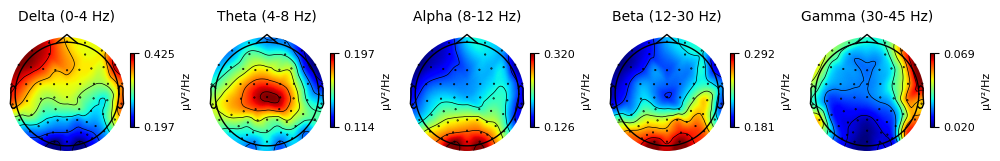

In [25]:
epochs_clean_R.compute_psd().plot_topomap(normalize=True, cmap='jet')

In [ ]:
epochs_clean_MF.save(path_guardar_suj + name_guardar_suj_MF, overwrite=True)
epochs_clean_R.save(path_guardar_suj + name_guardar_suj_R, overwrite=True)